In [1]:
# Works best with jupyter-notebook

In [98]:
%matplotlib notebook 
#%matplotlib widget 
# https://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import math
from spatialmath import *
from spatialmath.base import *
from collections import namedtuple
from roboticstoolbox import *
import roboticstoolbox.tools.trajectory as tr
import matplotlib.pyplot as plt

np.set_printoptions(linewidth=100, formatter={'float': lambda x: f"{x:8.4g}" if abs(x) > 1e-10 else f"{0:8.4g}"})

# Lecture 4.4

1D trajectory with via points

In [99]:
#Set a first point of 10, a last point of 30 and via points of 40, 10 and the last point
first=np.array(10)
last=np.array(30)
via=np.array([
    [10],
    [40],
    [10],
    [30]
    ])
print(first, last, via)


10 30 [[10]
 [40]
 [10]
 [30]]


1.1 0.275 [      10]
1.2000000000000002 0.30000000000000004 [      10]
1.3000000000000003 0.32500000000000007 [      10]
1.4000000000000004 0.3500000000000001 [      10]
1.5000000000000004 0.3750000000000001 [      10]
1.6000000000000005 0.40000000000000013 [      10]
1.7000000000000006 0.42500000000000016 [      10]
1.8000000000000007 0.4500000000000002 [      10]
1.9000000000000008 0.4750000000000002 [      10]
2.000000000000001 0.5000000000000002 [      10]
2.100000000000001 0.5250000000000002 [      10]
2.200000000000001 0.5500000000000003 [      10]
2.300000000000001 0.5750000000000003 [      10]
2.4000000000000012 0.6000000000000003 [      10]
2.5000000000000013 0.6250000000000003 [      10]
2.6000000000000014 0.6500000000000004 [      10]
2.7000000000000015 0.6750000000000004 [      10]
2.8000000000000016 0.7000000000000004 [      10]
2.9000000000000017 0.7250000000000004 [      10]
1.1 0.034375 [   11.03]
1.2000000000000002 0.037500000000000006 [   11.12]
1.3000000000000003 0.0

1.5000000000000004 0.0681818181818182 [   11.36]
1.6000000000000005 0.07272727272727275 [   11.45]
1.7000000000000006 0.0772727272727273 [   11.55]
1.8000000000000007 0.08181818181818185 [   11.64]
1.9000000000000008 0.0863636363636364 [   11.73]
2.000000000000001 0.09090909090909095 [   11.82]
2.100000000000001 0.0954545454545455 [   11.91]
2.200000000000001 0.10000000000000005 [      12]
2.300000000000001 0.1045454545454546 [   12.09]
2.4000000000000012 0.10909090909090914 [   12.18]
2.5000000000000013 0.1136363636363637 [   12.27]
2.6000000000000014 0.11818181818181825 [   12.36]
2.7000000000000015 0.1227272727272728 [   12.45]
2.8000000000000016 0.12727272727272734 [   12.55]
2.9000000000000017 0.1318181818181819 [   12.64]
3.0000000000000018 0.13636363636363644 [   12.73]
3.100000000000002 0.14090909090909098 [   12.82]
3.200000000000002 0.14545454545454553 [   12.91]
3.300000000000002 0.1500000000000001 [      13]
3.400000000000002 0.15454545454545465 [   13.09]
3.500000000000002

<IPython.core.display.Javascript object>


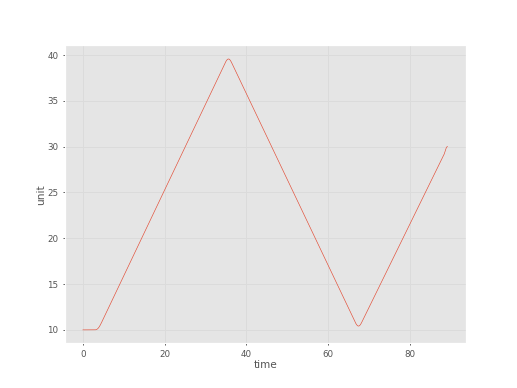

Text(0, 0.5, 'unit')

In [100]:
#Compute a trajectory with via points using the toolbox function mstraj(),
#accepting arguments of the via points, a velocity of 1 unit/second,
#null (for the moment), the initial position, the time interval of 0.1 seconds and acceleration time of 2 seconds
dt=0.1 # time interval 0.1 seconds
tacc=2 # acceleration time 2 seconds
speed=1 #velocity is 1 unit/second

out=tr.mstraj(via, dt, tacc, qdmax=speed, q0=first)

#plot
fig1=plt.figure(1)
plt.plot(out.t, out.q)
plt.xlabel('time')
plt.ylabel('unit')

2.1 0.2625 [      10]
2.2 0.275 [      10]
2.3000000000000003 0.28750000000000003 [      10]
2.4000000000000004 0.30000000000000004 [      10]
2.5000000000000004 0.31250000000000006 [      10]
2.6000000000000005 0.32500000000000007 [      10]
2.7000000000000006 0.3375000000000001 [      10]
2.8000000000000007 0.3500000000000001 [      10]
2.900000000000001 0.3625000000000001 [      10]
3.000000000000001 0.3750000000000001 [      10]
3.100000000000001 0.3875000000000001 [      10]
3.200000000000001 0.40000000000000013 [      10]
3.300000000000001 0.41250000000000014 [      10]
3.4000000000000012 0.42500000000000016 [      10]
3.5000000000000013 0.43750000000000017 [      10]
3.6000000000000014 0.4500000000000002 [      10]
3.7000000000000015 0.4625000000000002 [      10]
3.8000000000000016 0.4750000000000002 [      10]
3.9000000000000017 0.4875000000000002 [      10]
4.000000000000002 0.5000000000000002 [      10]
4.100000000000001 0.5125000000000002 [      10]
4.200000000000001 0.52500

6.399999999999993 0.2666666666666664 [   15.33]
6.499999999999993 0.27083333333333304 [   15.42]
6.5999999999999925 0.2749999999999997 [    15.5]
6.699999999999992 0.27916666666666634 [   15.58]
6.799999999999992 0.283333333333333 [   15.67]
6.8999999999999915 0.28749999999999964 [   15.75]
6.999999999999991 0.2916666666666663 [   15.83]
7.099999999999991 0.29583333333333295 [   15.92]
7.19999999999999 0.2999999999999996 [      16]
7.29999999999999 0.30416666666666625 [   16.08]
7.39999999999999 0.3083333333333329 [   16.17]
7.499999999999989 0.31249999999999956 [   16.25]
7.599999999999989 0.3166666666666662 [   16.33]
7.699999999999989 0.32083333333333286 [   16.42]
7.799999999999988 0.3249999999999995 [    16.5]
7.899999999999988 0.32916666666666616 [   16.58]
7.999999999999988 0.3333333333333328 [   16.67]
8.099999999999987 0.33749999999999947 [   16.75]
8.199999999999987 0.3416666666666661 [   16.83]
8.299999999999986 0.34583333333333277 [   16.92]
8.399999999999986 0.349999999999

<IPython.core.display.Javascript object>


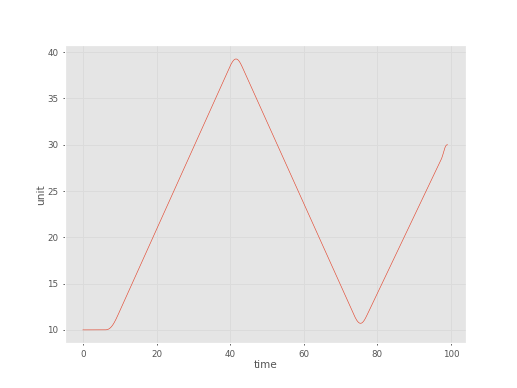

Text(0, 0.5, 'unit')

In [101]:
#Increasing the acceleration time from 2 to 4 seconds increases the amount by which the trajectory misses the via points:
dt=0.1 # time interval 0.1 seconds
tacc=4 # acceleration time 4 seconds
speed=1 #velocity is 1 unit/second

out=tr.mstraj(via, dt, tacc, qdmax=speed, q0=first)

#plot
fig2=plt.figure(2)
plt.plot(out.t, out.q)
plt.xlabel('time')
plt.ylabel('unit')

4.1 0.25625 [      10]
4.199999999999999 0.26249999999999996 [      10]
4.299999999999999 0.26874999999999993 [      10]
4.399999999999999 0.2749999999999999 [      10]
4.499999999999998 0.2812499999999999 [      10]
4.599999999999998 0.28749999999999987 [      10]
4.6999999999999975 0.29374999999999984 [      10]
4.799999999999997 0.2999999999999998 [      10]
4.899999999999997 0.3062499999999998 [      10]
4.9999999999999964 0.3124999999999998 [      10]
5.099999999999996 0.31874999999999976 [      10]
5.199999999999996 0.32499999999999973 [      10]
5.299999999999995 0.3312499999999997 [      10]
5.399999999999995 0.3374999999999997 [      10]
5.499999999999995 0.34374999999999967 [      10]
5.599999999999994 0.34999999999999964 [      10]
5.699999999999994 0.3562499999999996 [      10]
5.799999999999994 0.3624999999999996 [      10]
5.899999999999993 0.3687499999999996 [      10]
5.999999999999993 0.37499999999999956 [      10]
6.0999999999999925 0.38124999999999953 [      10]
6.19

33.400000000000205 0.878947368421058 [   13.63]
33.500000000000206 0.8815789473684265 [   13.55]
33.60000000000021 0.8842105263157949 [   13.47]
33.70000000000021 0.8868421052631634 [   13.39]
33.80000000000021 0.8894736842105319 [   13.32]
33.90000000000021 0.8921052631579003 [   13.24]
4.1 0.1464285714285714 [   12.93]
4.199999999999999 0.14999999999999997 [      13]
4.299999999999999 0.15357142857142853 [   13.07]
4.399999999999999 0.15714285714285708 [   13.14]
4.499999999999998 0.16071428571428564 [   13.21]
4.599999999999998 0.1642857142857142 [   13.29]
4.6999999999999975 0.16785714285714276 [   13.36]
4.799999999999997 0.17142857142857132 [   13.43]
4.899999999999997 0.17499999999999988 [    13.5]
4.9999999999999964 0.17857142857142844 [   13.57]
5.099999999999996 0.182142857142857 [   13.64]
5.199999999999996 0.18571428571428555 [   13.71]
5.299999999999995 0.1892857142857141 [   13.79]
5.399999999999995 0.19285714285714267 [   13.86]
5.499999999999995 0.19642857142857123 [   

<IPython.core.display.Javascript object>


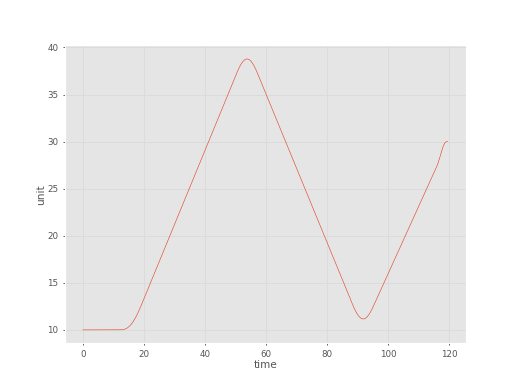

Text(0, 0.5, 'unit')

In [102]:
#Increasing the acceleration time from 4 to 8 seconds increases the amount by which the trajectory misses the via points:
dt=0.1 # time interval 0.1 seconds
tacc=8 # acceleration time 8 seconds
speed=1 #velocity is 1 unit/second

out=tr.mstraj(via, dt, tacc, qdmax=speed, q0=first)

#plot
fig3=plt.figure(3)
plt.plot(out.t, out.q)
plt.xlabel('time')
plt.ylabel('unit')

C:\ProgramData\Anaconda3\lib\site-packages\roboticstoolbox\tools\trajectory.py:683: RuntimeWarning: invalid value encountered in true_divide
  qd = dq / tseg
C:\ProgramData\Anaconda3\lib\site-packages\roboticstoolbox\tools\trajectory.py:263: RuntimeWarning: invalid value encountered in true_divide
  t = tv.flatten() / tscal


0.1 0.0033333333333333335 [    10.1]
0.2 0.006666666666666667 [    10.2]
0.30000000000000004 0.010000000000000002 [    10.3]
0.4 0.013333333333333334 [    10.4]
0.5 0.016666666666666666 [    10.5]
0.6 0.02 [    10.6]
0.7 0.02333333333333333 [    10.7]
0.7999999999999999 0.026666666666666665 [    10.8]
0.8999999999999999 0.029999999999999995 [    10.9]
0.9999999999999999 0.03333333333333333 [      11]
1.0999999999999999 0.03666666666666666 [    11.1]
1.2 0.04 [    11.2]
1.3 0.043333333333333335 [    11.3]
1.4000000000000001 0.04666666666666667 [    11.4]
1.5000000000000002 0.05000000000000001 [    11.5]
1.6000000000000003 0.053333333333333344 [    11.6]
1.7000000000000004 0.05666666666666668 [    11.7]
1.8000000000000005 0.06000000000000002 [    11.8]
1.9000000000000006 0.06333333333333335 [    11.9]
2.0000000000000004 0.06666666666666668 [      12]
2.1000000000000005 0.07000000000000002 [    12.1]
2.2000000000000006 0.07333333333333335 [    12.2]
2.3000000000000007 0.07666666666666669 

10.399999999999979 0.5199999999999989 [    20.4]
10.499999999999979 0.5249999999999989 [    20.5]
10.599999999999978 0.5299999999999989 [    20.6]
10.699999999999978 0.5349999999999989 [    20.7]
10.799999999999978 0.5399999999999989 [    20.8]
10.899999999999977 0.5449999999999988 [    20.9]
10.999999999999977 0.5499999999999988 [      21]
11.099999999999977 0.5549999999999988 [    21.1]
11.199999999999976 0.5599999999999988 [    21.2]
11.299999999999976 0.5649999999999988 [    21.3]
11.399999999999975 0.5699999999999987 [    21.4]
11.499999999999975 0.5749999999999987 [    21.5]
11.599999999999975 0.5799999999999987 [    21.6]
11.699999999999974 0.5849999999999987 [    21.7]
11.799999999999974 0.5899999999999987 [    21.8]
11.899999999999974 0.5949999999999986 [    21.9]
11.999999999999973 0.5999999999999986 [      22]
12.099999999999973 0.6049999999999986 [    22.1]
12.199999999999973 0.6099999999999987 [    22.2]
12.299999999999972 0.6149999999999987 [    22.3]
12.399999999999972 0

<IPython.core.display.Javascript object>


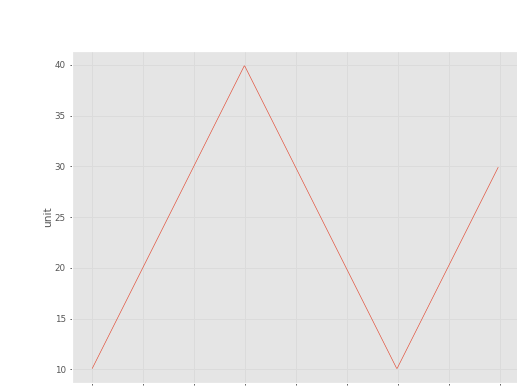

Text(0, 0.5, 'unit')

In [103]:
#Setting the acceleration time to 0, the via points are reached exactly but the trajectory is discontinuous:
dt=0.1 # time interval 0.1 seconds
tacc=0 # acceleration time 8 seconds
speed=1 #velocity is 1 unit/second

out=tr.mstraj(via, dt, tacc, qdmax=speed, q0=first)

#plot
fig4=plt.figure(4)
plt.plot(out.t, out.q)
plt.xlabel('time')
plt.ylabel('unit')

In [104]:
#Returning the acceleration time to 4 seconds 
#and doubling the velocity reduces the amount of time taken to execute the trajectory:
dt=0.1 # time interval 0.1 seconds
tacc=4 # acceleration time 4 seconds
speed=2 #velocity is 2 unit/second

out=tr.mstraj(via, dt, tacc, qdmax=speed, q0=first)

#plot
fig5=plt.figure(5)
plt.plot(out.t, out.q)
plt.xlabel('time')
plt.ylabel('unit')

2.1 0.2625 [      10]
2.2 0.275 [      10]
2.3000000000000003 0.28750000000000003 [      10]
2.4000000000000004 0.30000000000000004 [      10]
2.5000000000000004 0.31250000000000006 [      10]
2.6000000000000005 0.32500000000000007 [      10]
2.7000000000000006 0.3375000000000001 [      10]
2.8000000000000007 0.3500000000000001 [      10]
2.900000000000001 0.3625000000000001 [      10]
3.000000000000001 0.3750000000000001 [      10]
3.100000000000001 0.3875000000000001 [      10]
3.200000000000001 0.40000000000000013 [      10]
3.300000000000001 0.41250000000000014 [      10]
3.4000000000000012 0.42500000000000016 [      10]
3.5000000000000013 0.43750000000000017 [      10]
3.6000000000000014 0.4500000000000002 [      10]
3.7000000000000015 0.4625000000000002 [      10]
3.8000000000000016 0.4750000000000002 [      10]
3.9000000000000017 0.4875000000000002 [      10]
4.000000000000002 0.5000000000000002 [      10]
4.100000000000001 0.5125000000000002 [      10]
4.200000000000001 0.52500

<IPython.core.display.Javascript object>

Text(0, 0.5, 'unit')

[[10]
 [40]
 [10]
 [30]]
2.1 0.21000000000000002 [    16.3]
2.2 0.22000000000000003 [    16.6]
2.3000000000000003 0.23000000000000004 [    16.9]
2.4000000000000004 0.24000000000000005 [    17.2]
2.5000000000000004 0.25000000000000006 [    17.5]
2.6000000000000005 0.26000000000000006 [    17.8]
2.7000000000000006 0.2700000000000001 [    18.1]
2.8000000000000007 0.2800000000000001 [    18.4]
2.900000000000001 0.2900000000000001 [    18.7]
3.000000000000001 0.3000000000000001 [      19]
3.100000000000001 0.3100000000000001 [    19.3]
3.200000000000001 0.3200000000000001 [    19.6]
3.300000000000001 0.3300000000000001 [    19.9]
3.4000000000000012 0.34000000000000014 [    20.2]
3.5000000000000013 0.35000000000000014 [    20.5]
3.6000000000000014 0.36000000000000015 [    20.8]
3.7000000000000015 0.37000000000000016 [    21.1]
3.8000000000000016 0.38000000000000017 [    21.4]
3.9000000000000017 0.3900000000000002 [    21.7]
4.000000000000002 0.4000000000000002 [      22]
4.100000000000001 0.

C:\ProgramData\Anaconda3\lib\site-packages\roboticstoolbox\tools\trajectory.py:683: RuntimeWarning: invalid value encountered in true_divide
  qd = dq / tseg


<IPython.core.display.Javascript object>


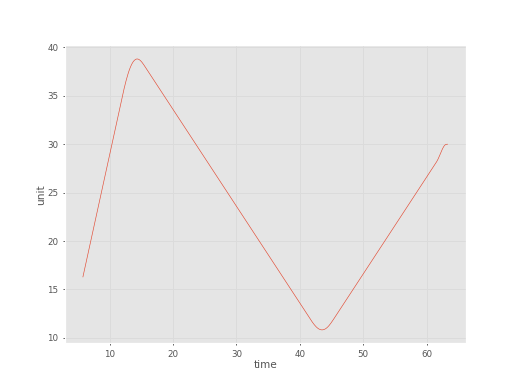

Text(0, 0.5, 'unit')

In [112]:
#Finally, the velocity specification can be removed and replaced with a time specification. 
#The time can be specified for each segment of the trajectory by passing a vector to the function. 
#In this case we'd like the first segment to last for 10 seconds, 
#the second segment to last for 30 seconds, 
#and the final segment to last for 20 seconds:
dt=0.1 # time interval 0.1 seconds
tacc=4 # acceleration time 4 seconds
print(via)
out=tr.mstraj(via, dt, tacc, tsegment=[0, 10, 30, 20], q0=first)

#plot
fig6=plt.figure(6)
plt.plot(out.t, out.q)
plt.xlabel('time')
plt.ylabel('unit')